In [1]:
## Week 11 notebook 1



### Decision Trees and Random Forests in Python 



### Decision Trees and Random Forests in Python 

## Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

## Get the data

df = pd.read_csv('/Users/taherehehsan/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


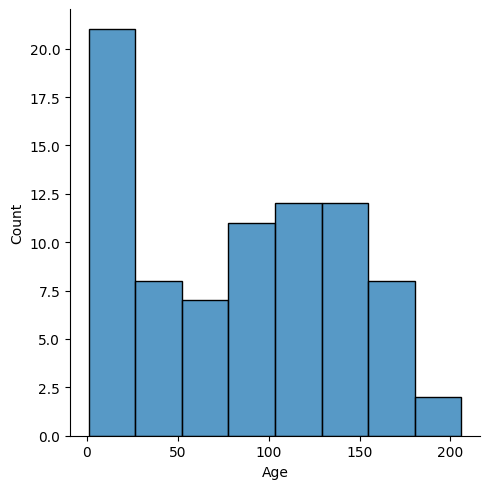

In [5]:
## EDA

sns.displot(x = df['Age'])

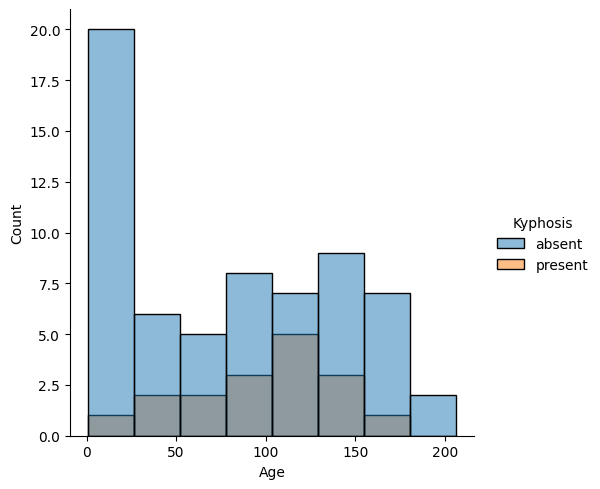

In [6]:
sns.displot(x = df['Age'], hue = df['Kyphosis'])

In [7]:
present = df[df['Kyphosis'] == 'present']

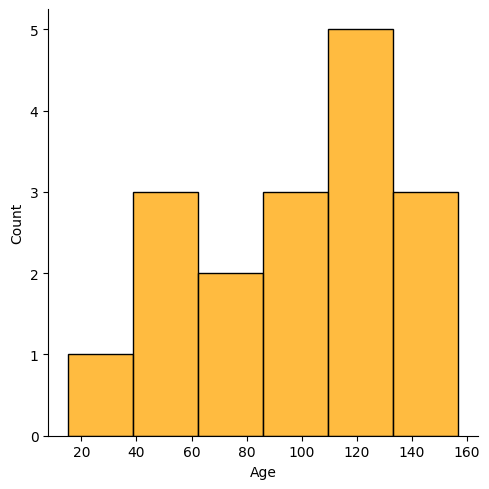

In [8]:
sns.displot(present['Age'], color= 'orange')

In [9]:
absent = df[df['Kyphosis']== 'absent']

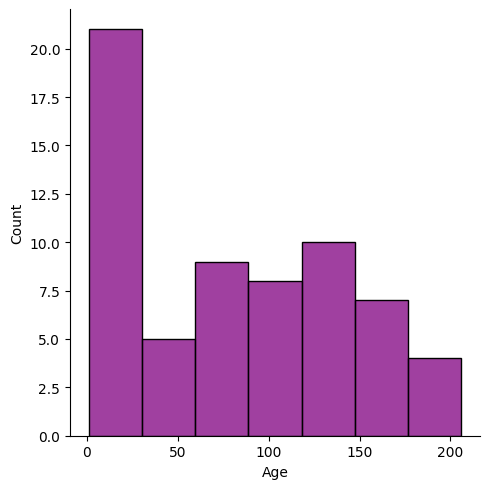

In [10]:
sns.displot(absent['Age'], color= 'purple')

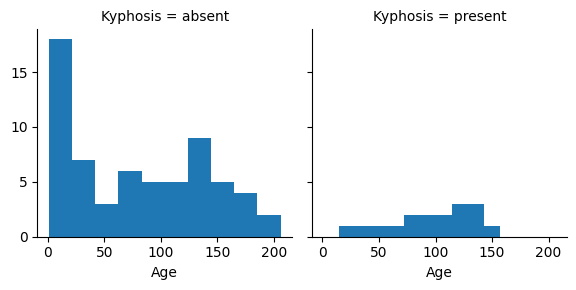

In [11]:

g = sns.FacetGrid(data= df, col = 'Kyphosis')
g.map(plt.hist, 'Age')

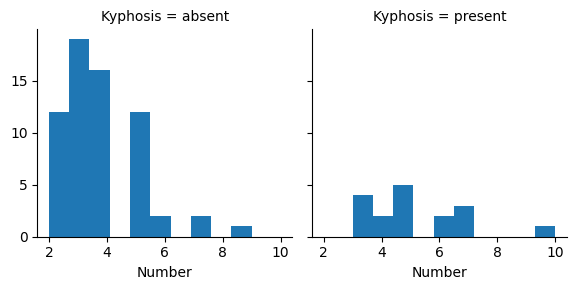

In [12]:
g = sns.FacetGrid(data= df, col = 'Kyphosis')
g.map(plt.hist, 'Number')

In [13]:

## Train Test Split

from sklearn.model_selection import train_test_split

In [14]:
x = df.drop('Kyphosis', axis =1)
y = df['Kyphosis']

In [15]:
x_train,x_test, y_train, y_test= train_test_split(x, y, test_size = 0.30)


In [16]:

## Decision Trees

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:

## Predictions And Evaluation 

predictions = dtree.predict(x_test)

In [19]:

from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.68      0.94      0.79        16
     present       0.67      0.22      0.33         9

    accuracy                           0.68        25
   macro avg       0.67      0.58      0.56        25
weighted avg       0.68      0.68      0.63        25



In [21]:
print(confusion_matrix(y_test, predictions))

[[15  1]
 [ 7  2]]


In [22]:
len(y_test)

25

In [23]:
sum(y_test == 'absent')

16

In [24]:
sum(y_test== 'present')

9

In [25]:
## Random Forests

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
rfc_pred = rfc.predict(x_test)

In [27]:
print(confusion_matrix(y_test, rfc_pred))

[[16  0]
 [ 7  2]]


In [28]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.70      1.00      0.82        16
     present       1.00      0.22      0.36         9

    accuracy                           0.72        25
   macro avg       0.85      0.61      0.59        25
weighted avg       0.81      0.72      0.66        25



In [68]:

## Logistic Regression Model 

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [69]:
logmodel.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
prediction = logmodel.predict(x_test)

In [71]:
print(confusion_matrix(y_test, prediction))

[[2424    7]
 [ 434    9]]


In [72]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [34]:


##################

##############

#########

##### Random Forest Project

#########

#############

#################



In [35]:
## Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:

## Get the Data

loans = pd.read_csv('/Users/taherehehsan/loan_data.csv')

In [37]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [38]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [39]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

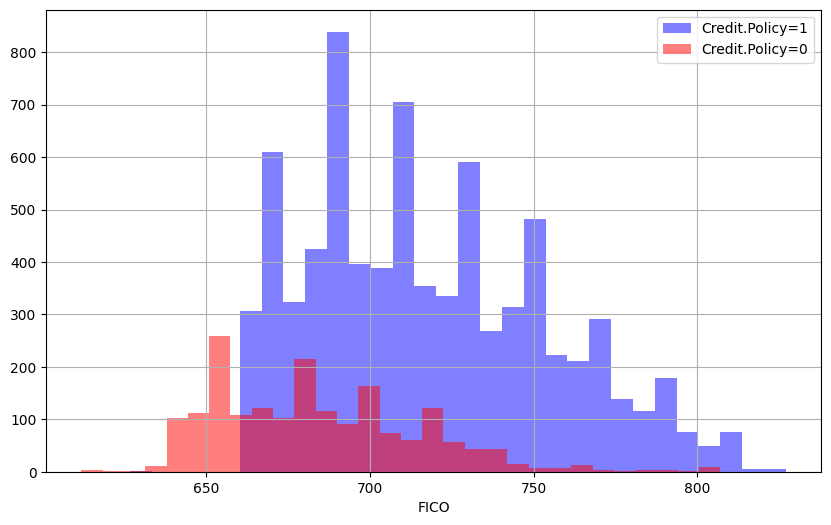

In [40]:

## EDA
# Create a histogram of two FICO distributions on top of each other,
# one for each credit.policy outcome

plt.figure(figsize = (10, 6))

loans[loans['credit.policy']== 1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')

loans[loans['credit.policy']== 0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

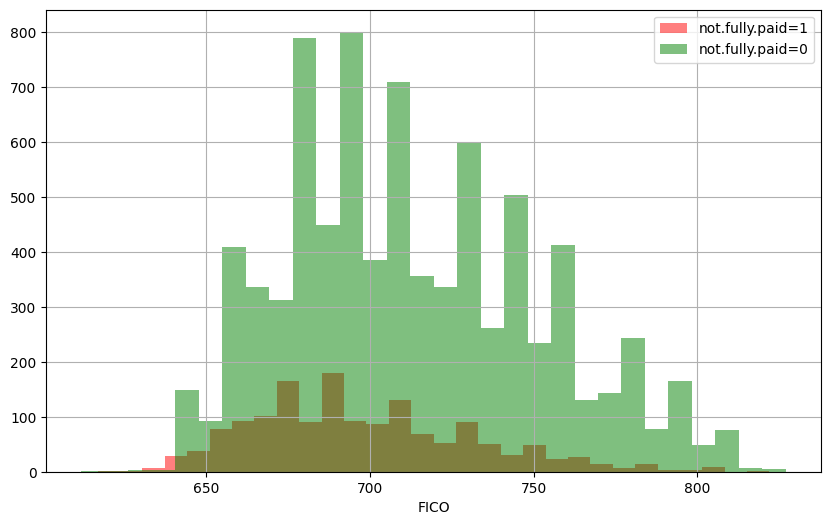

In [41]:

plt.figure(figsize= (10, 6))

loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='green',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

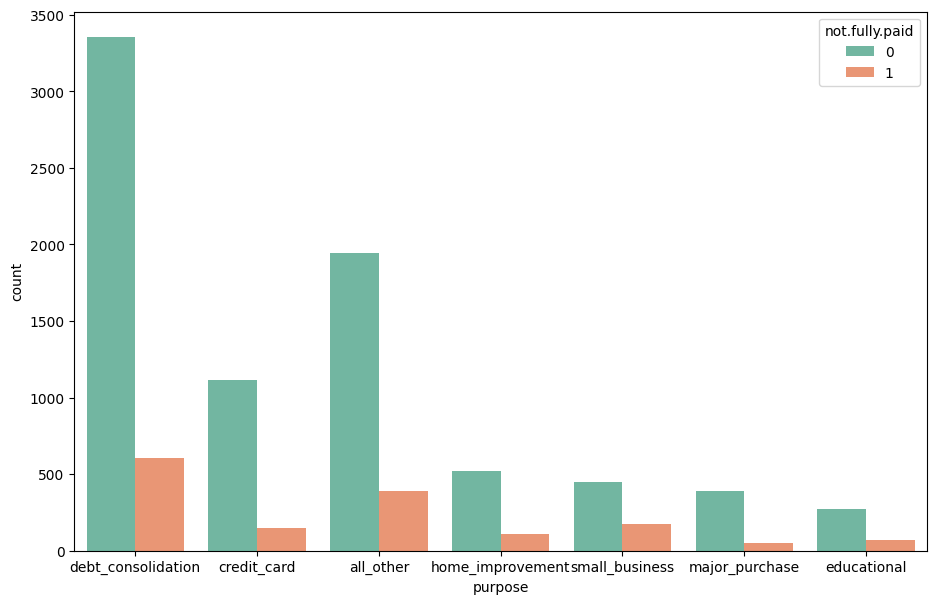

In [42]:

plt.figure(figsize = (11, 7))

sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set2')

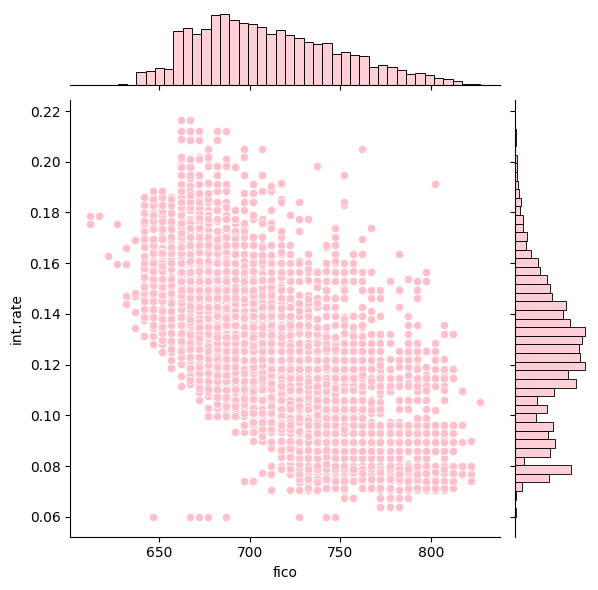

In [43]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans, color='pink')

<Figure size 1100x700 with 0 Axes>

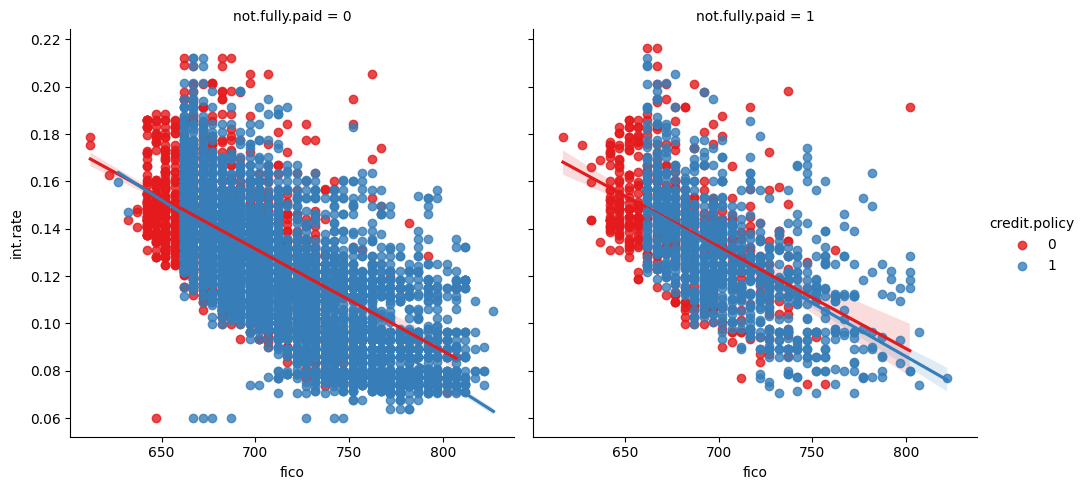

In [44]:
plt.figure(figsize=(11,7))

sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [45]:

## Setting up the Data

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [46]:

## Turn Categorical features to numerical

cat_feat = ['purpose'] 


In [47]:
final_data = pd.get_dummies(loans, columns = cat_feat, drop_first = True )

In [48]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [49]:

## Train Test Split

from sklearn.model_selection import train_test_split

In [50]:
x = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=101)

In [52]:

## Training a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

In [53]:
dtree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [54]:

### Predictions and Evaluation of Decision Tree

predictions = dtree.predict(x_test)

In [55]:

from sklearn.metrics import confusion_matrix, classification_report

In [56]:
print(confusion_matrix(y_test, predictions))

[[1988  443]
 [ 335  108]]


In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [58]:

## Training the Random Forest model

from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier(n_estimators=600)

In [60]:
rfc.fit(x_train, y_train)

,n_estimators,600
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
## Predictions and Evaluation

rfc_pred = rfc.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
print(confusion_matrix(y_test, rfc_pred))

[[2422    9]
 [ 432   11]]


In [64]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.55      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [65]:

# What performed better the random forest or the decision tree?


# Depends what metric you are trying to optimize for. 
# Notice the recall for each class for the models.
# Neither did very well, more feature engineering is needed.
